#**Analysis of video game sales</br>**

Video games have become very popular these days, each year they progress in technology and bring new genres to the industry.</br>
Video game industry is one of the biggest and fastest growing industry in the world, there is no shortage of games being released every year on all the different platforms. This project aims to do some basic data analysis on video game sales throughout the years, to find some interesting patterns and answer some basic questions about the data. The analysis will be based on [this](https://www.kaggle.com/gregorut/videogamesales) free dataset from kaggle.</br>
The dataset contains the sales for various games along with the platform, year. The sales are further classified on the basis of regoins.
This project is part of the [Data analysis with python: zero to pandas](https://jovian.ai/outlink?url=zerotopandas.com) course offered by [Jovian.ml](https://jovian.ai/outlink?url=https%3A%2F%2Fwww.jovian.ml) 



### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.

## Downloading the Dataset

We download and load the the dataset from kaggle using the opendatasets library, we pass the url from where we want to download the dataset and it downloads and saves it in the same folder as this file

In [1]:
!pip install jovian opendatasets --upgrade --quiet

     |████████████████████████████████| 68 kB 4.6 MB/s 


We begin by downloading the video game sales dataset

In [2]:
# Adress of the dataset on kaggle
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mizerable
Your Kaggle Key: ··········


100%|██████████| 381k/381k [00:00<00:00, 95.2MB/s]

The dataset has been downloaded

In [4]:
# Directory where the csv is stored
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

In [6]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/videogamesales/vgsales.csv')

##Data cleaning and transformation:

Lets take a look at our dataset

In [7]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
df.shape

(16598, 11)

As you can see our dataset has 16598 rows and 11 columns, lets see what all the columns are.

In [9]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

These are all the 11 columns we have in our dataset, since we already have **rank** column we can just use that as our index, let's set our index to **rank**.

In [10]:
# We use pandas.set_index method to set the index as the Rank column i.e df.['Rank'], 
# we also modify the orignal df instead of making a copy by settin inplace = True
df.set_index(df['Rank'], inplace= True)

In [12]:
df = df.drop('Rank',axis =1)

Lets look at some basic description about our data.

In [13]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Lets see some info about the data itself, are there any null values? what are the dtype of each column?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


We can see that there are 6 float-type columns and 4 object-type columns. This is what we would expect to see as all the numeric data(Year, sales) are float-type while all the strings are object-type.</br>
</br>
We also see that we have some missing or null values in _year_ and _publisher_, lets have a look at these rows.

In [15]:
df[df.isnull().any(axis = 1)] # we select any row that has a null value

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01


There doesn't seem to be any pattern in the missing data, we can assume that these are missing values at completly random.</br>
This won't be a huge problem for our analysis of this data, so we can just keep the _Year_ column as is since deleting 300+ rows of data will effect our analysis.</br> Also we can not fill these null values with some other data like the mean year because we can be completely wrong in our assumption and ruin our analysis with false data.</br></br>
However we can fill all the NaN _Publisher_ with 'Unknown'

Filling NaN **Publisher** Values with **'Unknown'**:

In [16]:
df.Publisher.fillna('Unknown', inplace = True)

In [17]:
#Checking the dataframe again
df[df.isnull().any(axis = 1)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


As you can see we have replaced all the NaN values in publisher column with 'Unknown'

Now lets check wheather there are any duplicates in our Dataset

In [18]:
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


It looks like we have **one** row of duplicated data, let us take a further look to make sure that this is indeed a duplicate.
</br>
We will look at all the _Wii de Asobu: Metroid Prime_ games.

In [19]:
df[df['Name'] == 'Wii de Asobu: Metroid Prime'] #Selecting all the games with name Wii de Asobu: Metroid Prime

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


As we can observe that the said row was indeed a duplicate.</br>
We will drop this row now.

In [20]:
df.drop_duplicates(inplace = True)

Let us see the oldest 5 and the newest 5 games in our dataset.

In [21]:
# first we have to drop the nan values temporarily so that we dont select those rows
df2 = df.dropna(subset = ['Year'])
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [22]:
#Sorting the new Dataframe by year in ascending order so that the oldest are first
#and the newest are the last rows
oldest_games_df = df2.sort_values(by = 'Year', ascending = True).head()
newest_games_df = df2.sort_values(by = 'Year', ascending = True).tail()

oldest_games_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15


In [23]:
newest_games_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
4822,EA Sports UFC 2,XOne,2016.0,Sports,Electronic Arts,0.23,0.14,0.00,0.04,0.40
16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29


There seems to be discrepancy here. The Dataset is from **2015** however there are entries upto **2020**.</br>
This could be an error or perhaps these are pre-ordered sales of games that will be releasing after 2015. These are not required for our purposes so we will remove them.

In [24]:
df = df[df.Year < 2016]

In [25]:
df.sort_values(by='Year', ascending = False).head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
6827,F1 2015,XOne,2015.0,Racing,Codemasters,0.08,0.15,0.00,0.02,0.24
8430,Payday 2,XOne,2015.0,Shooter,505 Games,0.08,0.07,0.00,0.01,0.17
12449,Risen 3: Titan Lords,PS4,2015.0,Role-Playing,Deep Silver,0.00,0.05,0.00,0.01,0.06
14650,Parfait,PSV,2015.0,Adventure,TGL,0.00,0.00,0.03,0.00,0.03
2952,Minecraft: Story Mode,PS3,2015.0,Adventure,Mojang,0.25,0.33,0.00,0.11,0.69


These are 5 of the newest games in our dataset

 Even by looking at just the oldest and the newest **5** games we can see how much the video game industry has increased in terms of genre and publishers

Now let's see all the different publishers in the dataset.

In [26]:
df.Publisher.value_counts()

Electronic Arts                 1319
Activision                       952
Ubisoft                          904
Namco Bandai Games               888
Konami Digital Entertainment     815
                                ... 
Milestone                          1
Abylight                           1
Glams                              1
Locus                              1
Rain Games                         1
Name: Publisher, Length: 564, dtype: int64

It would be better if we can just group all the publishers with less than 10 game into a single _Others_ category.</br>
we will update our Dataframe with all these publishers grouped

In [27]:
publishers = df.Publisher.value_counts() 

#Select all the publishers with less than 11 games
publishers_lt_ten = publishers.index[publishers.lt(11)]

publishers_lt_ten

Index(['Brash Entertainment', 'Scholastic Inc.', 'Ackkstudios', 'Starfish',
       'Cave', 'Xplosiv', 'Yeti', 'Sunsoft', 'Popcorn Arcade', 'ArtDink',
       ...
       'Hearty Robin', 'Nippon Amuse', 'Origin Systems', 'Seventh Chord',
       'Mitsui', 'Milestone', 'Abylight', 'Glams', 'Locus', 'Rain Games'],
      dtype='object', length=422)

In [28]:
#replacing all the above publishers with 'Others'
df.replace(publishers_lt_ten, 'Others', inplace = True)

#lets see the publisher columns now
df.Publisher.value_counts()

Electronic Arts            1319
Others                     1207
Activision                  952
Ubisoft                     904
Namco Bandai Games          888
                           ... 
Metro 3D                     12
Mattel Interactive           12
Marvelous Entertainment      11
Hudson Entertainment         11
Sammy Corporation            11
Name: Publisher, Length: 143, dtype: int64

We have shrunk the number of unique publisher from **578** to **144**. This will make reading our data and graph easier. 

## Data analysis and visualisation:

###Genre:
Lets look at the all the different genre and the percent of each.

In [29]:
genre_df = df.groupby('Genre').Name.count()
genre_df

Genre
Action          3133
Adventure       1242
Fighting         822
Misc            1692
Platform         866
Puzzle           571
Racing          1206
Role-Playing    1429
Shooter         1250
Simulation       841
Sports          2266
Strategy         661
Name: Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

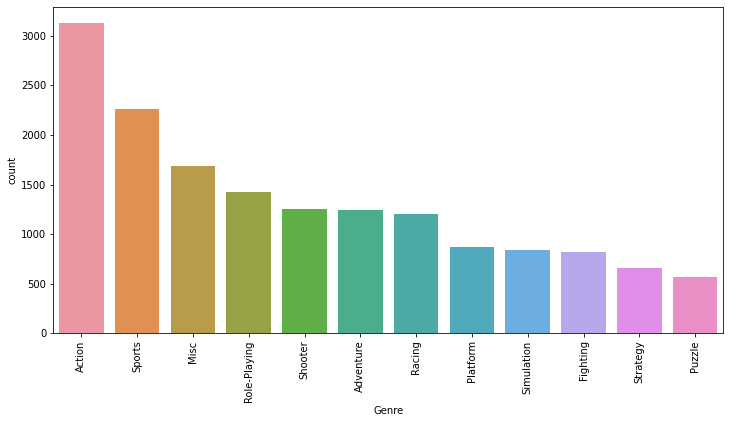

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df.Genre, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)

###Region:
Lets look which region has the most games sold...

In [31]:
#selecting only the regions from our main df
top_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
#Summing the sales of each region
top_region = top_region.sum().reset_index()
#renaming the dataframe columns
top_region = top_region.rename(columns={"index": "region", 0: "sale"})
top_region

,region,sale
0,NA_Sales,4310.50
1,EU_Sales,2382.36
2,JP_Sales,1270.55
3,Other_Sales,781.24


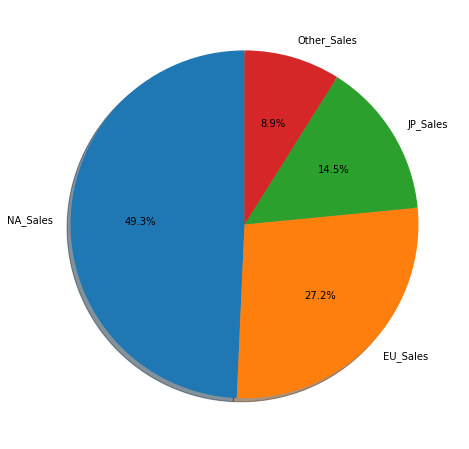

In [32]:
plt.figure(figsize=(12, 8))
plt.pie(top_region.sale, labels=top_region.region, autopct='%1.1f%%', shadow=True, startangle=90);#autopct gives format for the the numbers in the pie chart

From the pie chart we can see that most of the games are sold in NA.
There is a huge market for video games in NA and publishers probably focus on NA more than any other region

###Game:
Lets see which is the best selling game till date.

In [33]:
#sorting and selecting the top games from the dataset
top_game_df = df.sort_values(by = 'Global_Sales', ascending = False).head(10)
top_game_df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


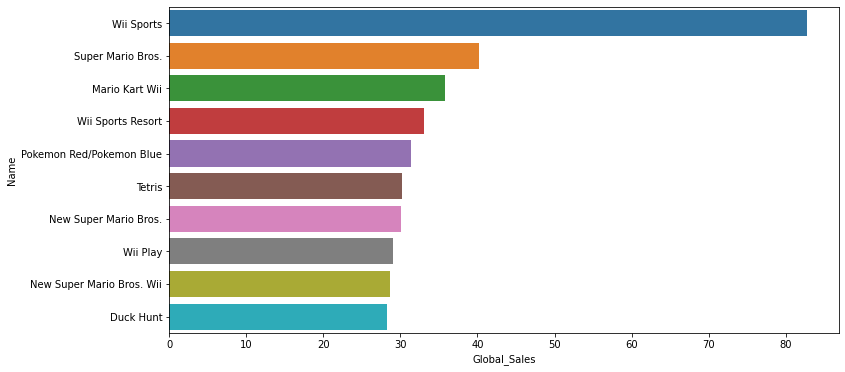

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x = top_game_df.Global_Sales, y = top_game_df.Name);

Wii sport has double the sales than the second best selling game.</br>
There is a lot of demand for unique games like wii sports

###Relation of columns:
Let us see if there is some sort of relation between the columns of our dataframe

In [35]:
df.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.085347,0.011394,-0.170121,0.047488,-0.069223
NA_Sales,-0.085347,1.000000,0.770262,0.451618,0.634225,0.941499
EU_Sales,0.011394,0.770262,1.000000,0.437859,0.725572,0.903753
JP_Sales,-0.170121,0.451618,0.437859,1.000000,0.290955,0.613358
Other_Sales,0.047488,0.634225,0.725572,0.290955,1.000000,0.747362
Global_Sales,-0.069223,0.941499,0.903753,0.613358,0.747362,1.000000


This is not so easy to understand from this table, lets make a heatmap

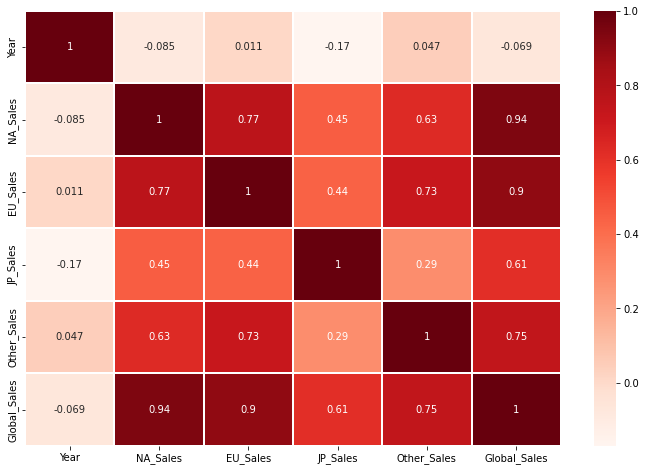

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap = "Reds", annot=True, linewidth=1);

Lets make a pair plot to clearly see the co-relation.

First lets drop the name column since the correlation is between 

In [37]:
pair = df.drop('Name', axis = 1)

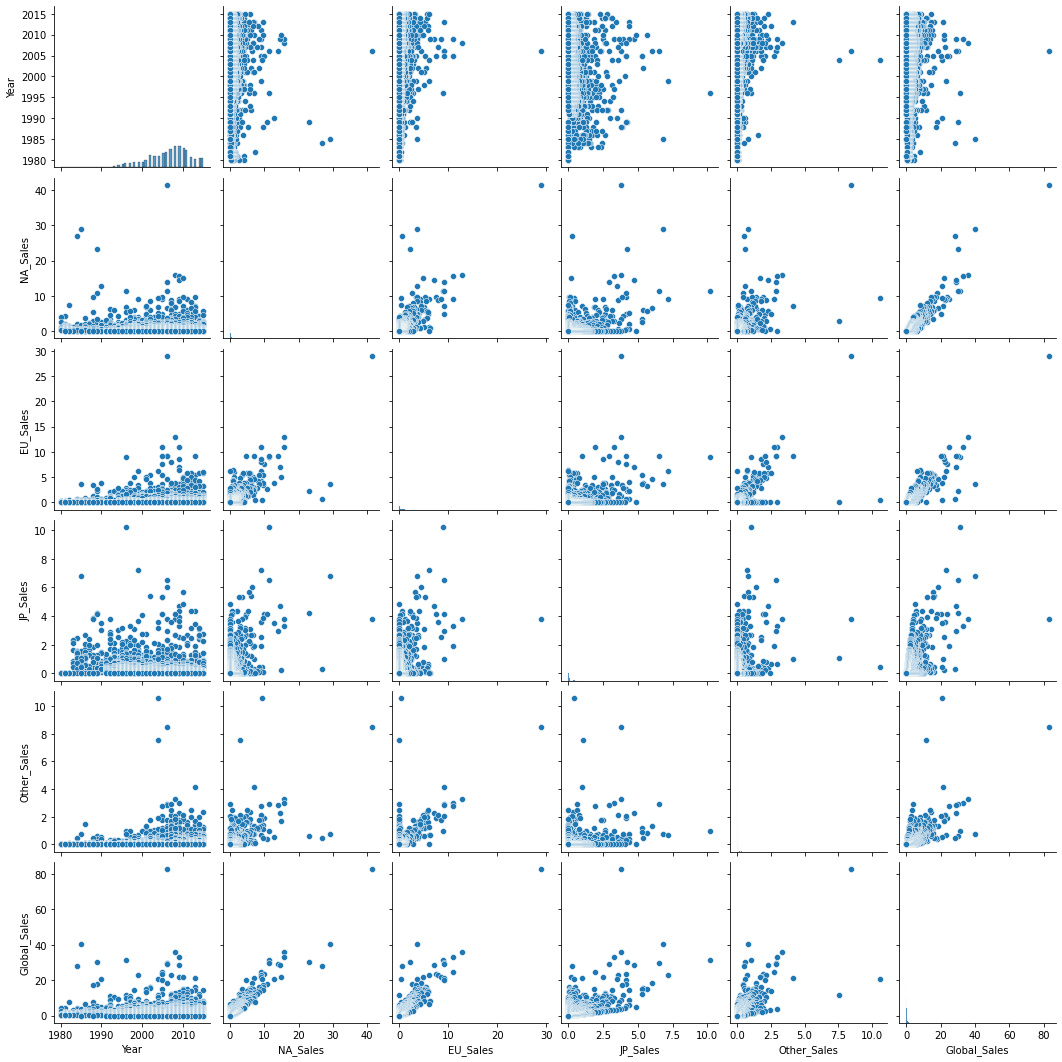

In [38]:
sns.pairplot(df)

##Question and answers:

Lets try and answer some questions we have about this data...

###**Q.1**: Which are the top publishers?

We can look at this question from two points of view:</br>

1.   Which are the top publishers in terms of sales.
2.   Which are the top publishers in terms of number of games.




Lets answer the first part, i.e top publishers in terms of sales.

In [39]:
#First we group the data by publisher then we add all the values in global sales for that publisher
#after we know the total global sale of the publishers we sort them in descending order 
#we then take the top 10 values from this
top_publisher_sales = df.groupby('Publisher').Global_Sales.sum().sort_values(ascending = False).head(10)
top_publisher_sales

Publisher
Nintendo                        1780.96
Electronic Arts                 1081.14
Activision                       717.74
Sony Computer Entertainment      600.72
Ubisoft                          463.49
Take-Two Interactive             396.41
THQ                              340.44
Konami Digital Entertainment     277.35
Sega                             269.89
Namco Bandai Games               247.16
Name: Global_Sales, dtype: float64

This looks very uninteresting lets make a graph of this

Text(0.5, 1.0, 'Top 10 Publisher(Sales)')

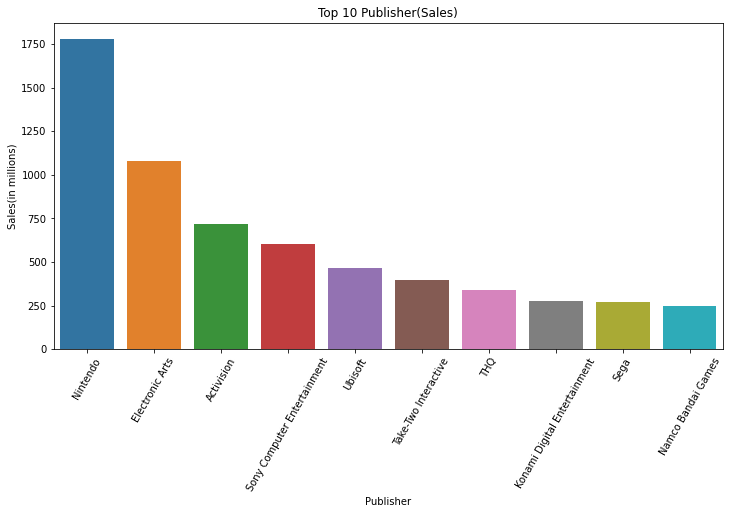

In [40]:
plt.figure(figsize = (12,6));
plt.xticks(rotation = 60);
sns.barplot(x = top_publisher_sales.index ,y = top_publisher_sales.values);
plt.ylabel('Sales(in millions)')
plt.title('Top 10 Publisher(Sales)')

That looks a lot better, and it is clear to see that nintendo is doing way better than its competition in terms of sales, but let us see how it does in terms of number of games published

In [41]:
top_publisher_games = df.groupby('Publisher').Name.count().sort_values(ascending = False)
top_publisher_games

Publisher
Electronic Arts            1319
Others                     1207
Activision                  952
Ubisoft                     904
Namco Bandai Games          888
                           ... 
XS Games                     12
Mattel Interactive           12
Hudson Entertainment         11
Marvelous Entertainment      11
Sammy Corporation            11
Name: Name, Length: 143, dtype: int64

The _others_ category has also appeared in the top publishers by number of games, however since it is an aggregate of lots of small publishers we will drop it.

In [42]:
top_publisher_games = top_publisher_games.drop('Others').head(10)

In [43]:
top_publisher_games

Publisher
Electronic Arts                 1319
Activision                       952
Ubisoft                          904
Namco Bandai Games               888
Konami Digital Entertainment     815
THQ                              712
Nintendo                         686
Sony Computer Entertainment      677
Sega                             622
Take-Two Interactive             400
Name: Name, dtype: int64

Again this looks very boring so lets make a chart.

Text(0.5, 1.0, 'Top 10 Publisher(No of Games)')

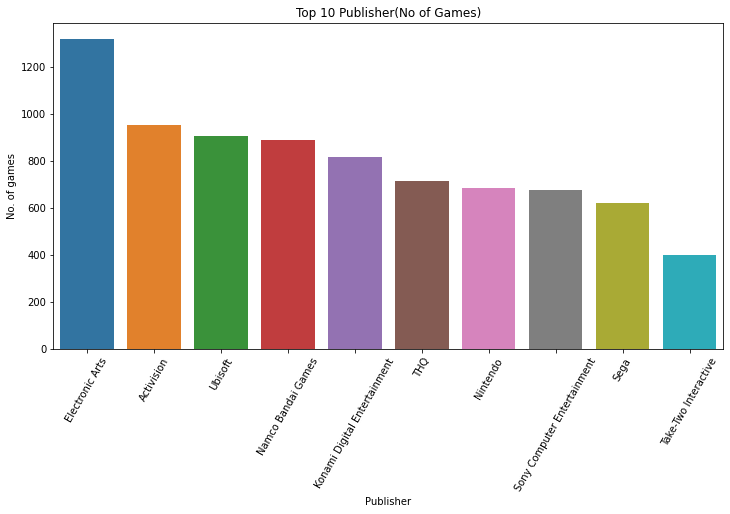

In [44]:
plt.figure(figsize = (12,6));
plt.xticks(rotation = 60);
sns.barplot(x = top_publisher_games.index ,y = top_publisher_games.values);
plt.ylabel('No. of games')
plt.title('Top 10 Publisher(No of Games)')

Comparing the two graphs we can see that the top selling publishers are not necessarily also creating a lot of games, some publisher have few games but lots of sales others have lots of game but comparitively fewer sales.

###**Q.2**: How do the top publishers compare in terms of regional sales?
we have looked at the global sales but it would be interesting to know if some publishers have a huge market in only some regions.

In [45]:
#Selecting only the required columns
q2_df = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
q2_df

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,
1,Nintendo,41.49,29.02,3.77,8.46
2,Nintendo,29.08,3.58,6.81,0.77
3,Nintendo,15.85,12.88,3.79,3.31
4,Nintendo,15.75,11.01,3.28,2.96
5,Nintendo,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16596,Kemco,0.01,0.00,0.00,0.00
16597,Infogrames,0.01,0.00,0.00,0.00
16598,Activision,0.00,0.00,0.00,0.00


In [46]:
#Taking sum of all the sales in respective region for each publisher
q2_df = q2_df.groupby('Publisher').sum()
q2_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
3DO,6.48,3.04,0.00,0.63
505 Games,31.77,16.09,2.01,5.35
5pb,0.02,0.00,1.57,0.00
989 Studios,9.23,3.30,0.10,0.67
ASCII Entertainment,0.70,0.44,9.40,0.36
...,...,...,...,...
Warner Bros. Interactive Entertainment,73.97,47.15,1.02,16.69
XS Games,1.18,0.17,0.00,0.11
Zoo Digital Publishing,9.52,2.45,0.14,0.78


In [47]:
#From above Dataframe Selecting only the publisher that were in the top publisher by sales(from Question 1)
q2_df = q2_df.loc[top_publisher_sales.index]
#Resetting index to numeric value instead of publisher
q2_df.reset_index(inplace = True)

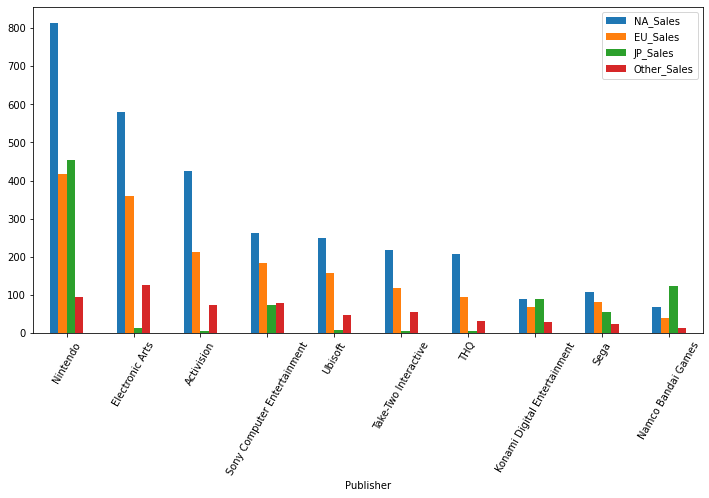

In [48]:
#plotting a joint bargraph of above DataFrame
q2_df.plot(x="Publisher", y=["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales"], kind="bar",figsize=(12,6))
plt.xticks(rotation = 60)
plt.show()

The amount of sales in each region seems proportionate to the total number of sales, except a few cases like _namco bandai_, _Sega_, _konami_  having more sales in **japan** compared to _Electronic Arts_ and _Activision_.</br>
_Nintendo_ also has a lot more japan sales compared to _EA_ and _Activision_

Lets make a heatmap to compare them all at the same time

In [49]:
#prepare the dataframe for this purpose
q2_df2 = df[['Publisher','NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']]

#Same as previous
q2_df2 = q2_df2.groupby('Publisher').sum()
q2_df2 = q2_df2.loc[top_publisher_sales.index]

q2_df2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Nintendo,814.59,417.37,453.82,94.99
Electronic Arts,580.58,360.47,13.89,126.00
Activision,424.34,212.33,6.40,74.35
Sony Computer Entertainment,262.79,184.68,73.88,79.35
Ubisoft,248.69,158.65,7.09,48.86
Take-Two Interactive,218.64,117.33,5.81,54.76
THQ,208.60,94.60,5.01,32.11
Konami Digital Entertainment,88.90,68.14,90.30,29.84
Sega,108.65,81.27,55.70,24.27


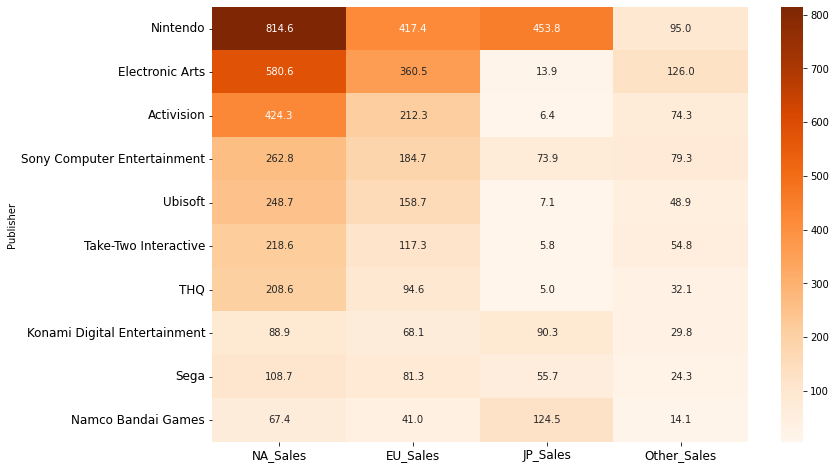

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(q2_df2, annot=True, cmap = 'Oranges', fmt = '.1f')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###**Q.3**: Are Sales increasing or decreasing every year?
Now we will inspect whether the video games industry keeps growing or was it just a hype that is dying now.

In [51]:
#Selecting the required columns from df
q3_df = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']]
q3_df

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,
1,2006.0,41.49,29.02,3.77,8.46,82.74
2,1985.0,29.08,3.58,6.81,0.77,40.24
3,2008.0,15.85,12.88,3.79,3.31,35.82
4,2009.0,15.75,11.01,3.28,2.96,33.00
5,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16596,2002.0,0.01,0.00,0.00,0.00,0.01
16597,2003.0,0.01,0.00,0.00,0.00,0.01
16598,2008.0,0.00,0.00,0.00,0.00,0.01


In [52]:
#Creating a new dataframe and grouping it by Years and taking the sum of each column 
sales_by_year = q3_df.groupby('Year').sum()

#Lets see the new Dataframe
sales_by_year.tail()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2011.0,241.06,167.44,53.04,54.39,515.99
2012.0,154.96,118.78,51.74,37.82,363.54
2013.0,154.77,125.80,47.59,39.82,368.11
2014.0,131.97,125.65,39.46,40.02,337.05
2015.0,102.82,97.71,33.72,30.01,264.44


Text(0, 0.5, 'sales(in millions)')

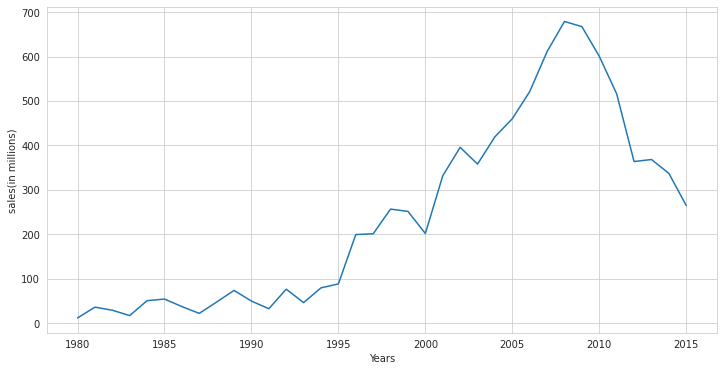

In [53]:
#Setting the style for graphs
sns.set_style("whitegrid")

#Setting the size of graphs
plt.figure(figsize=(12,6))
#Plotting the graph using the new Dataframe
plt.plot(sales_by_year.index, sales_by_year.Global_Sales);

#Setting x and y labels
plt.xlabel('Years')
plt.ylabel('sales(in millions)')

This is very interesting! The sales according to our Dataset seem to be decreasing after 2010.</br>
This Could be due to various reasons like:
*   Decrease in number of games released every year
*   Lost of interest in video games
*   Incomplete Dataset



Lets look at the sales of each region over the years.

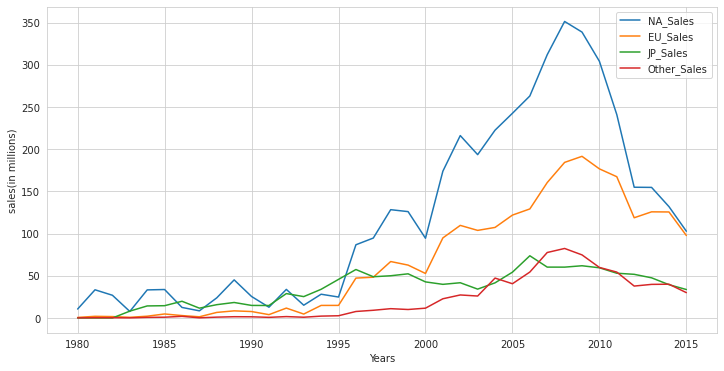

In [54]:
plt.figure(figsize=(12,6))
#Instead of Global sales we look at individual sales, 
plt.plot(sales_by_year.index, sales_by_year.NA_Sales);#for NA
plt.plot(sales_by_year.index, sales_by_year.EU_Sales);#for EU
plt.plot(sales_by_year.index, sales_by_year.JP_Sales);#for JP
plt.plot(sales_by_year.index, sales_by_year.Other_Sales);#for others

plt.xlabel('Years')
plt.ylabel('sales(in millions)')
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

It seems that NA has a lot of sales that increase in huge amount after 1995, EA follows a similiar trend but with less magnitude, JP on the other hand seems to be constant from 1995 in terms of sales and other region see increase after 2000, this is because these regions were introduced to video games later.

Lets see how the top 5 publishers do every year.

In [55]:
#These are the top ten 10 publishers we found in Q1, we will select only 5 from these
top_publisher_sales.index

Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ',
       'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games'],
      dtype='object', name='Publisher')

In [56]:
#Make a Dataframe for this purpose
q3_df = df[['Year','Publisher','Global_Sales']]

#Craete a different Dataframe for each publisher, This will make
#things a lot easier when plotting the graph

nintendo_df = q3_df[q3_df.Publisher == 'Nintendo'].groupby('Year').sum()
EA_df = q3_df[q3_df.Publisher == 'Electronic Arts'].groupby('Year').sum()
activision_df = q3_df[q3_df.Publisher == 'Activision'].groupby('Year').sum()
sony_df = q3_df[q3_df.Publisher == 'Sony Computer Entertainment'].groupby('Year').sum()
sega_df = q3_df[q3_df.Publisher == 'Sega'].groupby('Year').sum()

In [57]:
#example of how the newly created Dataframe look like
EA_df

,Global_Sales
Year,
1992.0,0.06
1994.0,0.65
1995.0,3.33
1996.0,7.90
1997.0,22.94
1998.0,29.95
1999.0,20.15
2000.0,25.13
2001.0,45.12


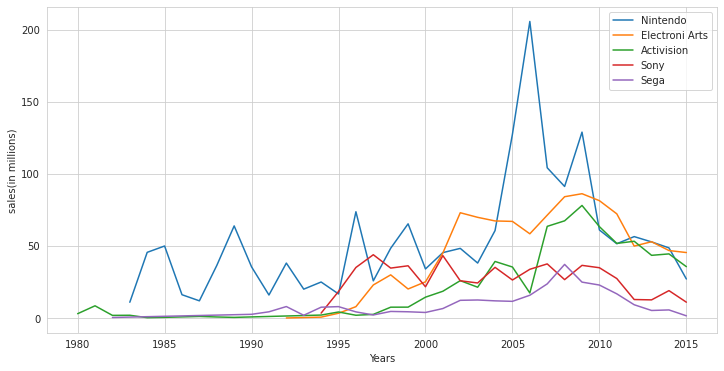

In [58]:
#Plotting the Graph
plt.figure(figsize=(12,6))
plt.plot(nintendo_df.index, nintendo_df.values );
plt.plot(EA_df.index, EA_df.values);
plt.plot(activision_df.index, activision_df.values);
plt.plot(sony_df.index, sony_df.values);
plt.plot(sega_df.index, sega_df.values);

plt.xlabel('Years')
plt.ylabel('sales(in millions)')
plt.legend(['Nintendo', 'Electroni Arts', 'Activision', 'Sony','Sega'])

Here we can see that there are a lot of spikes, these are probably around the time a new game was released by the respective publisher, causing an increase in sales.</br>
all the publisher seem to have an increase in sales over time, however sony seems to be relatively constant in sales</br></br>
We have a huge spike in nintendo sales at 2006, this must mean a very big game or lots of games were released that year by nintendo, lets find out..

In [59]:
#Selecting all the entries from 2006 that were published by nintendo
df[(df.Year == 2006) & (df.Publisher == 'Nintendo')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
377,Clubhouse Games,DS,2006.0,Misc,Nintendo,0.59,1.83,0.73,0.35,3.50
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,Nintendo,0.00,0.99,2.32,0.02,3.33
445,Personal Trainer: Cooking,DS,2006.0,Misc,Nintendo,0.91,1.00,1.03,0.17,3.12
491,WarioWare: Smooth Moves,Wii,2006.0,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92


As you can see nintendo released a lot of games that year which caused a huge spike in its sales.

###**Q.4**: What are the average sales globally?

In [60]:
#Make a copy of df to manipulate for this question
q4 = df.copy()
q4.sort_values(by = 'Year', axis = 0, inplace = True)
q4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.00,0.00,0.24
5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34
4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.00,0.01,0.49
6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.00,0.00,0.27
2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...
7942,3rd Super Robot Wars Z: Tengoku-Hen,PSV,2015.0,Action,Namco Bandai Games,0.00,0.00,0.19,0.00,0.19
2006,Project CARS,PS4,2015.0,Racing,Others,0.17,0.69,0.02,0.15,1.04
16046,Raven's Cry,PS4,2015.0,Role-Playing,Others,0.00,0.01,0.00,0.00,0.01


Since the year are discrete values it will take a lot of space on the graph to cover avereage sales of each year.</br>
So we will make a range of 5 years and plot the average sales of 5 years

In [61]:
#Replacing all the values in speciic interval with their corresponding value
q4.replace(np.arange(1980,1986,1), '1980-85',  inplace = True )
q4.replace(np.arange(1986,1991,1), '1986-90',  inplace = True)
q4.replace(np.arange(1991,1996,1), '1991-95',  inplace = True)
q4.replace(np.arange(1996,2001,1), '1996-00',  inplace = True)
q4.replace(np.arange(2001,2006,1), '2001-05',  inplace = True)
q4.replace(np.arange(2006,2011,1), '2006-10',  inplace = True)
q4.replace(np.arange(2011,2016,1), '2011-15',  inplace = True)
q4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
6898,Checkers,2600,1980-85,Misc,Atari,0.22,0.01,0.00,0.00,0.24
5368,Freeway,2600,1980-85,Action,Activision,0.32,0.02,0.00,0.00,0.34
4027,Ice Hockey,2600,1980-85,Sports,Activision,0.46,0.03,0.00,0.01,0.49
6319,Bridge,2600,1980-85,Misc,Activision,0.25,0.02,0.00,0.00,0.27
2671,Boxing,2600,1980-85,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...
7942,3rd Super Robot Wars Z: Tengoku-Hen,PSV,2011-15,Action,Namco Bandai Games,0.00,0.00,0.19,0.00,0.19
2006,Project CARS,PS4,2011-15,Racing,Others,0.17,0.69,0.02,0.15,1.04
16046,Raven's Cry,PS4,2011-15,Role-Playing,Others,0.00,0.01,0.00,0.00,0.01


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

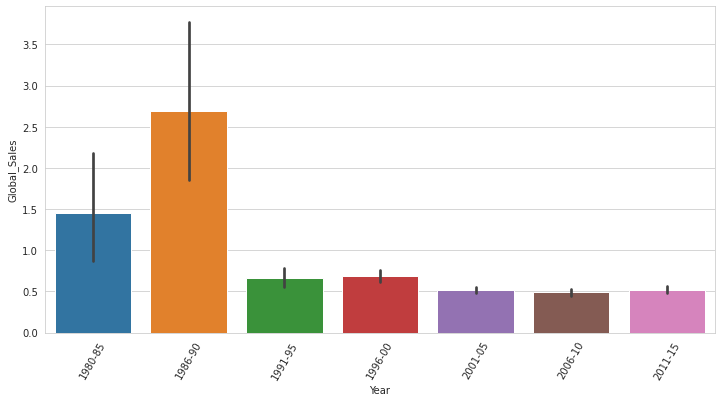

In [62]:
plt.figure(figsize = (12,6))
sns.barplot(x = q4.Year, y = q4.Global_Sales)
plt.xticks(rotation = 60)

There were lots of sales done between 1986 and 1990 but there also seems to be a lot of variance so the we cant really be sure if there indeed was a lot of sale that year or if it is an error in the dataset

Lets try and take a look at the global sales between 1986-90

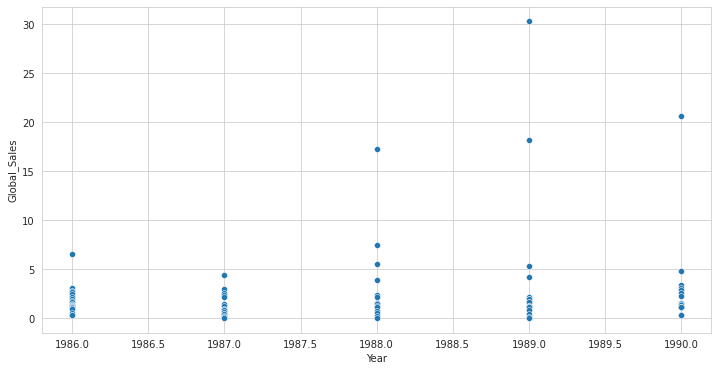

In [63]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = df[(df.Year > 1985) & (df.Year<1991)].Year, y = df.Global_Sales) #Selecting the year from df where df is in between 1985 and 1991

As we can see there seems to be 4 outliers, and it is probably because of these few points our variance is high.

###**Q.5**: Which console has the most games sold?

In [64]:
q5 = df.copy()
q5 = q5.groupby('Platform').Global_Sales.sum()#summing the global sales of each platform
q5 = q5.reset_index()
q5 = q5.sort_values(by = 'Global_Sales', ascending = False)#sorting the new Dataframe
q5

,Platform,Global_Sales
16,PS2,1233.46
28,X360,968.78
17,PS3,946.76
26,Wii,909.81
4,DS,818.67
15,PS,727.39
6,GBA,313.56
19,PSP,291.71
5,GB,254.42
13,PC,252.45


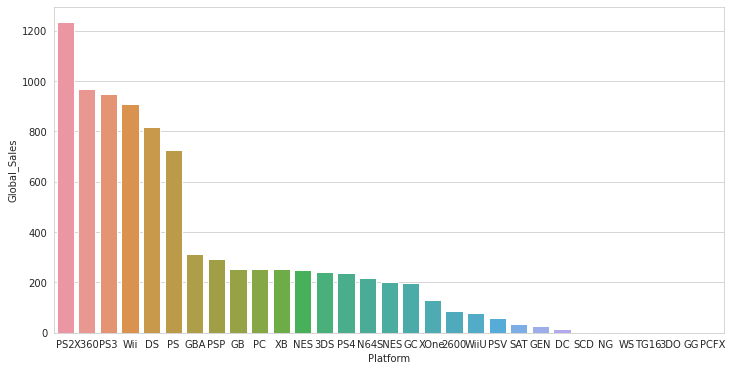

In [65]:
plt.figure(figsize= (12,6))
sns.barplot(x = q5.Platform, y = q5.Global_Sales)

Lets see which platform had the most games, regardless of how much they sold.

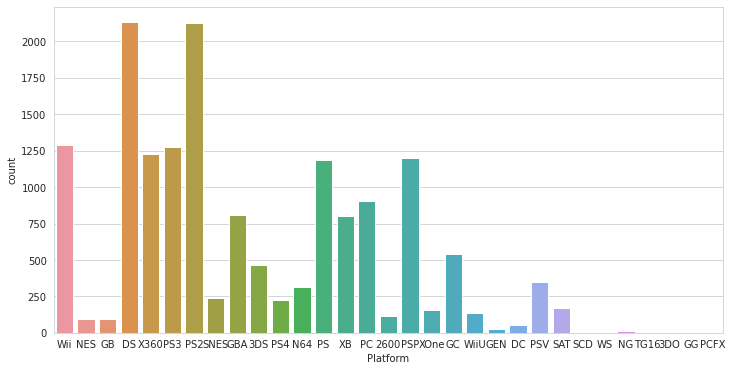

In [66]:
plt.figure(figsize= (12,6))
sns.countplot(x = df.Platform)#plots the platforms based on their frequency

##Inferences and Conclusion:
After completing just this basic analysis we can already say a lot about our data.</br>
In terms of success with making games we can clearly see that **nintendo** is way ahead of its competitors, out of the **10** best selling games it has **7** games. </br>
It is also the top publisher in terms of global sale, even though it doesn't have the most games published, it still has more games sold than, say, Electronic Arts.</br>
</br>
Out of all the paltforms **PS2** is by far the most popular and best selling game console. The number of games for the console also reflect it's popularity.</br>
The other console that comes close to the **PS2** is the **DS**.
Being one of the first game console in the market it shows how many indie developers were making games for the **DS**.
</br></br>
Out of all the popular regions, **NA** plays the most games, games have been sold there since the 1980's, it also contributes the most to the global sales and the global market. So much so that the graph for _NA sales_ and _Global Sales_ look pretty much identical.
</br></br>
Among the genre of games Action games have been and still are the most popular, this could be mostly due to the fact that a lot of children play video games and action is thier favourite genre.</br></br>
The video game industry has grown a lot over the past few decades and continues to do so.

##Refrences and further work:
* https://matplotlib.org/
* https://seaborn.pydata.org/
* https://stackoverflow.com/questions/17812978/how-to-plot-two-columns-of-a-pandas-data-frame-using-points
* https://stackoverflow.com/questions/44087637/pandas-how-does-indexslice-work

Further work can be done on this dataset by firstly updating it to the latest values. The missing years will also provide some info if found.
We can use this data to figure out what type of game will be the most profitable and which type of game hasn't been in the market for a long time.